In [111]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import os, sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')

import toolbox

In [112]:
def hedging_effectiveness(rm, rs, rh):
    if rm.startswith('Variance'):
        return 1 - toolbox.Variance(rh) / toolbox.Variance(rs)

    elif rm.startswith('ERM'):
        k = float(rm[rm.find('=') + 1:])
        return 1 - toolbox.ERM_estimate_trapezoidal(k, rh) / toolbox.ERM_estimate_trapezoidal(k, rs)

    elif rm.startswith('ES'):
        q = float(rm[rm.find('=') + 1:])
        return 1 - toolbox.ES(q, rh) / toolbox.ES(q, rs)

    elif rm.startswith('VaR'):
        q = float(rm[rm.find('=') + 1:])
        return 1 - toolbox.VaR(q, rh) / toolbox.VaR(q, rs)

In [113]:
def rh_summary_statistics(df, coin_name, rm,  start='2000-01-01'):
    
    df = df.loc[df.Date >= start,:]
    
    rs = df.rs
    rf = df.rf
    rh = df.rh

    m1 = np.mean(rh)
    m2 = np.std(rh)
    m3 = ss.skew(rh) # Pearson coefficient of skewness
    m4 = ss.kurtosis(rh) # Pearson coefficient of kurtosis

    _max = np.max(rh)
    _min = np.min(rh)
    
    HE = hedging_effectiveness(rm, rh_df.rs, rh_df.rh)
    avg_h = np.mean(df.h)
    
    _dict = {'m1':m1, 'm2':m2, 'm3':m3, 'm4':m4, 
            'max':_max, 'min':_min, 'HE':HE, 'avg_h':avg_h}
    
    return pd.DataFrame([_dict], [coin_name])

In [114]:
result_names = ['BBT_Tiingo',
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',
                'BBT_future_BITX',
                'BBT_future_BITW20', 
                'BBT_future_BITW70', 
                'BBT_future_BITW100', 
                'BBT_future_CRIX']

coin_names = ['btc', 'ada', 'eth', 'ltc', 'xrp',
              'BITX', 'BITW20', 'BITW70', 'BITW100', 'CRIX']


_index = ['btc','eth','ada','ltc','xrp','BITX','CRIX','BITW100','BITW20','BITW70']

result_coin_mapper = dict(zip(result_names, coin_names))

OHR = pd.read_csv('../../results/%s/MM/OHR.csv'%result_names[0])
risk_measures = list(np.unique(OHR.loc[:, 'risk measure']))

In [115]:
rm = 'Variance'

Variance_HE = pd.DataFrame()
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
    Variance_HE = Variance_HE.append(rh_summary_statistics(rh_df, result_coin_mapper[rn], rm))
    
Variance_HE = Variance_HE.reindex(_index) 
Variance_HE

,m1,m2,m3,m4,max,min,HE,avg_h
btc,0.000190,0.003937,-0.848746,11.502473,0.021959,-0.031939,0.992946,0.958784
eth,0.001480,0.036681,1.052334,7.224297,0.235847,-0.183764,0.609580,0.955919
ada,0.002226,0.051342,1.177583,4.137028,0.271491,-0.135097,0.381859,0.906219
ltc,-0.001342,0.041892,-0.087606,5.654079,0.192421,-0.289900,0.569409,0.939190
xrp,-0.000887,0.065366,1.178418,21.129542,0.536262,-0.525256,0.191199,0.794878
BITX,0.000624,0.009787,-0.233914,13.116497,0.054654,-0.075528,0.954092,0.953736
CRIX,0.000850,0.008846,0.058306,15.255697,0.057881,-0.071210,0.960671,0.953689
BITW100,0.000997,0.011708,-1.677459,22.751919,0.057244,-0.111597,0.935701,0.953674
BITW20,0.002370,0.035431,-0.200011,3.747338,0.135354,-0.203582,0.585315,0.943535
BITW70,0.003820,0.041178,-0.924737,6.021717,0.141267,-0.273856,0.498614,0.766948


In [126]:
rm = 'ERM k=10'

ERM_HE = pd.DataFrame()
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
    ERM_HE = ERM_HE.append(rh_summary_statistics(rh_df, result_coin_mapper[rn], rm))
    
ERM_HE = ERM_HE.reindex(_index)
ERM_HE

,m1,m2,m3,m4,max,min,HE,avg_h
btc,0.000162,0.003978,-0.858931,11.474309,0.021799,-0.032175,0.912564,0.961366
eth,0.001468,0.036694,1.050493,7.225058,0.235921,-0.183843,0.450174,0.961960
ada,0.002002,0.050727,1.234124,4.370508,0.271552,-0.134779,0.291842,0.956010
ltc,-0.001630,0.041592,-0.092108,5.839540,0.191020,-0.289980,0.388254,0.958941
xrp,-0.001837,0.065129,1.209282,21.897764,0.542405,-0.525267,0.166958,0.946190
BITX,0.000629,0.009803,-0.235361,13.051025,0.054715,-0.075608,0.819168,0.953771
CRIX,0.000858,0.008854,0.063329,15.244743,0.057926,-0.071201,0.847105,0.954585
BITW100,0.001002,0.011723,-1.677854,22.706320,0.057306,-0.111677,0.788528,0.953810
BITW20,0.002560,0.035282,-0.213276,3.839188,0.135323,-0.203661,0.388729,0.953218
BITW70,0.002752,0.038347,-0.708572,5.201741,0.126594,-0.239808,0.366430,0.940162


In [117]:
rm = 'VaR q=0.01'

VaR1_HE = pd.DataFrame()
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
    VaR1_HE = VaR1_HE.append(rh_summary_statistics(rh_df, result_coin_mapper[rn], rm))
    
VaR1_HE = VaR1_HE.reindex(_index)
VaR1_HE

,m1,m2,m3,m4,max,min,HE,avg_h
btc,0.000128,0.004013,-0.807866,11.065146,0.021814,-0.032153,0.916099,0.967305
eth,0.001444,0.036613,1.055778,7.244267,0.235111,-0.183561,0.559052,0.966751
ada,0.002017,0.050759,1.235156,4.372449,0.271663,-0.135755,0.357318,0.957021
ltc,-0.001627,0.041531,-0.089517,5.840581,0.190954,-0.289697,0.494380,0.961498
xrp,-0.001767,0.065045,1.213008,21.987390,0.542168,-0.525245,0.157172,0.936458
BITX,0.000568,0.009783,-0.217867,13.115525,0.054826,-0.075325,0.859569,0.961953
CRIX,0.000830,0.008840,0.057042,15.189833,0.057959,-0.071086,0.876062,0.961869
BITW100,0.000941,0.011708,-1.657181,22.544522,0.057416,-0.111394,0.844573,0.962267
BITW20,0.002485,0.035316,-0.209252,3.823413,0.135156,-0.203379,0.489803,0.961391
BITW70,0.002795,0.038394,-0.730477,5.318664,0.126772,-0.241416,0.525620,0.935387


In [118]:
rm = 'VaR q=0.05'

VaR5_HE = pd.DataFrame()
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
    VaR5_HE = VaR5_HE.append(rh_summary_statistics(rh_df, result_coin_mapper[rn], rm))
    
VaR5_HE = VaR5_HE.reindex(_index)
VaR5_HE

,m1,m2,m3,m4,max,min,HE,avg_h
btc,0.000186,0.003982,-0.876690,11.448105,0.021784,-0.032197,0.904305,0.957643
eth,0.001485,0.036778,1.047215,7.201815,0.236740,-0.183764,0.454905,0.958134
ada,0.001993,0.050720,1.230881,4.356223,0.271499,-0.133980,0.231765,0.954368
ltc,-0.001634,0.041653,-0.094959,5.816945,0.191100,-0.289900,0.331852,0.955626
xrp,-0.001880,0.065185,1.207011,21.838880,0.542620,-0.525292,0.210468,0.953523
BITX,0.000676,0.009825,-0.234918,12.876474,0.054662,-0.075528,0.821610,0.945908
CRIX,0.000882,0.008885,0.075035,15.021636,0.057861,-0.071113,0.847294,0.948990
BITW100,0.001050,0.011733,-1.674758,22.593950,0.057252,-0.111597,0.773239,0.946419
BITW20,0.002608,0.035281,-0.214724,3.828824,0.135486,-0.203582,0.300087,0.946416
BITW70,0.002728,0.038276,-0.687216,5.056709,0.125862,-0.237246,0.324498,0.943884


In [119]:
rm = 'ES q=0.01'

ES1_HE = pd.DataFrame()
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
    ES1_HE = ES1_HE.append(rh_summary_statistics(rh_df, result_coin_mapper[rn], rm))
    
ES1_HE = ES1_HE.reindex(_index)
ES1_HE

,m1,m2,m3,m4,max,min,HE,avg_h
btc,0.000152,0.004117,-0.781408,10.401067,0.021961,-0.031936,0.906674,0.965128
eth,0.001448,0.036496,1.067119,7.356654,0.235359,-0.183057,0.491285,0.966840
ada,0.002067,0.050692,1.243918,4.393912,0.271776,-0.135785,0.467707,0.952629
ltc,-0.001584,0.041378,-0.082687,5.825164,0.191618,-0.289193,0.427507,0.959950
xrp,-0.001690,0.064928,1.219658,22.126052,0.541708,-0.525244,0.099203,0.920483
BITX,0.000540,0.009801,-0.192060,12.801612,0.054939,-0.074821,0.792123,0.966016
CRIX,0.000817,0.008850,0.061445,14.996509,0.057973,-0.070813,0.820729,0.963563
BITW100,0.000909,0.011729,-1.624350,22.043101,0.057530,-0.110891,0.744672,0.965837
BITW20,0.002451,0.035330,-0.207520,3.800764,0.135180,-0.202875,0.516999,0.963662
BITW70,0.002826,0.038580,-0.761311,5.494296,0.127917,-0.245347,0.432923,0.922805


In [120]:
rm = 'ES q=0.05'

ES5_HE = pd.DataFrame()
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))
    ES5_HE = ES5_HE.append(rh_summary_statistics(rh_df, result_coin_mapper[rn], rm))
    
ES5_HE = ES5_HE.reindex(_index)
ES5_HE

,m1,m2,m3,m4,max,min,HE,avg_h
btc,0.000149,0.004004,-0.836562,11.122708,0.021815,-0.032151,0.911050,0.965397
eth,0.001461,0.036652,1.052764,7.242959,0.235525,-0.183782,0.493889,0.965006
ada,0.002006,0.050748,1.235747,4.378056,0.271610,-0.135016,0.355300,0.958155
ltc,-0.001625,0.041570,-0.090767,5.850338,0.191027,-0.289918,0.430974,0.961312
xrp,-0.001804,0.065098,1.211216,21.933248,0.542293,-0.525258,0.150886,0.941937
BITX,0.000612,0.009796,-0.227291,13.114041,0.054773,-0.075546,0.823291,0.958118
CRIX,0.000846,0.008853,0.069558,15.133161,0.057959,-0.070972,0.852688,0.959496
BITW100,0.000986,0.011715,-1.674904,22.729919,0.057363,-0.111615,0.786267,0.958298
BITW20,0.002536,0.035291,-0.213457,3.839177,0.135264,-0.203599,0.413701,0.957615
BITW70,0.002760,0.038377,-0.719503,5.251334,0.126590,-0.240435,0.388900,0.939628


In [121]:
result_names

['BBT_Tiingo',
 'BBT_future_Tiingo_ada',
 'BBT_future_Tiingo_eth',
 'BBT_future_Tiingo_ltc',
 'BBT_future_Tiingo_xrp',
 'BBT_future_BITX',
 'BBT_future_BITW20',
 'BBT_future_BITW70',
 'BBT_future_BITW100',
 'BBT_future_CRIX']

ERM k=10


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


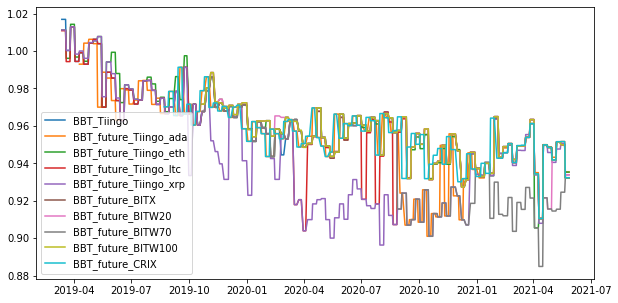

In [124]:
# rn = result_names[0]
plt.figure(figsize=(10,5))

rm = risk_measures[0]
print(rm)
for rn in result_names:
    rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))

    rh_df.Date = pd.to_datetime(rh_df.Date)
    plt.plot(rh_df.Date, rh_df.h, label=rn)
    
plt.legend()

In [125]:
rn = result_names[4]
rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%(rn, rm))

rh_df

,Unnamed: 0,Date,rh,rs,rf,h,copula
0,0,2021-05-27 20:00:00+00:00,-0.018541,-0.012393,0.006583,0.933887,Plackett
1,1,2021-05-26 20:00:00+00:00,0.050439,0.080924,0.032643,0.933887,Plackett
2,2,2021-05-25 20:00:00+00:00,0.039575,-0.018555,-0.062245,0.933887,Plackett
3,3,2021-05-24 20:00:00+00:00,-0.147437,-0.059344,0.094330,0.933887,Plackett
4,4,2021-05-21 20:00:00+00:00,-0.075449,-0.177064,-0.108809,0.933887,Plackett
5,0,2021-05-20 20:00:00+00:00,-0.006044,0.014197,0.021291,0.950684,Plackett
6,1,2021-05-19 20:00:00+00:00,-0.218105,-0.304108,-0.090465,0.950684,Plackett
7,2,2021-05-18 20:00:00+00:00,0.050068,0.031345,-0.019694,0.950684,Plackett
8,3,2021-05-17 20:00:00+00:00,0.227867,0.102715,-0.131645,0.950684,Plackett
9,4,2021-05-14 20:00:00+00:00,0.058553,0.093586,0.036850,0.950684,Plackett


In [ ]:
2019-05-30 20:00:00+00:00 to 2020-08-05 20:00:00+00:00
2019-08-02 20:00:00+00:00 to 2020-10-08 20:00:00+00:00	
2019-11-11 21:00:00+00:00 to 2021-01-20 21:00:00+00:00	